# Shashwat, Arjit, Harshal-Group 12

# Description of the problem

The simulation of labor market dynamics using agent-based models aims to address several key problems related to labor market outcomes. Some of these problems include:

1. Understanding the impact of technological change on the labor market: The rapid pace of technological change is transforming the nature of work and creating new types of jobs while rendering others obsolete. Agent-based models can help simulate the impact of these changes on the labor market.

2. Modeling worker heterogeneity: All workers are not the same, and there is significant variation in their skills, education, experience, and preferences. Agent-based models can incorporate this heterogeneity to simulate the behavior and interactions of workers with different characteristics.

3. Modeling employer heterogeneity: All employers are also not the same , industry, profitability, affect their behavior and decision-making. Agent-based models can incorporate these differences to simulate the behavior and interactions of employers .

4. To analyse the impact of worker and employer preferences on labor market outcomes: Workers and employers have different preferences, such as wage levels, job security, work-life balance. Agent-based models can simulate the impact of these preferences on labor market outcomes and identify potential policy interventions to improve outcomes for both workers and employers.

### References

1. Tesfatsion, L. (2006). Agent-based computational economics: A constructive approach to economic theory. Handbook of computational economics, 2, 831-880.

2. Investing in Information Technology: Productivity Payoffs for U.S. Industries (Kevin J. Stiroh) - https://papers.ssrn.com/sol3/papers.cfm?abstract_id=702573

3. The curious case of investing in education - https://economictimes.indiatimes.com/news/economy/policy/the-curious-case-of-investment-in-education/articleshow/80306498.cms?from=mdr

4. The Impact of Training on Productivity and Wages: Firm Level Evidence (Jozef Konings, Stijn Vanormelingen) -  https://docs.iza.org/dp4731.pdf


# Description of the Model


An agent-based multi-period model is a useful tool for simulating labor market dynamics because it allows for the modeling of individual behavior and interactions between agents in a changing environment time to time.


There are two major agents in the labor market dynamics. These include workers and employers/firms.


The choices/strategies conisdered by worker:

1. Education and Training: Worker can choose to invest in education to improve their skills and increase their chances of finding higher-paying jobs.

2. Wage Negotiation: Workers can negotiate their wages with employers to try and secure higher pay for their work.

3. Labor Market Participation: Workers can decide whether to participate in the labor market, for example, by choosing to work full-time, or not at all.


The choices/strategies conisdered by employers:

1. Hiring: They can choose to hire new workers based on their business needs and performance.

2. Firing:Worker can choose to fire worker based on the needs

3. Investment in Technology: Employers can invest in new technologies to increase productivity and reduce labor costs.

The workers and the employers make decisions iteratively over 50 times, the unemployemnt rate, average education level, average wages, average productivty has been calculated for these 50 iterations.

As we have **developed the model entirely on our own**, there are not many changes involved. However, we have taken inspiration from different sources to make decisions about the choices of employers and workers in the model. The links for these sources are:

1. https://www.rba.gov.au/publications/bulletin/2018/jun/labour-market-outcomes-for-younger-people.html

2. https://www.ilo.org/legacy/english/intserv/working-papers/wp078/index.html

3. https://www.aeaweb.org/articles?id=10.1257/jep.29.3.3

While it may be true that we developed this model independently, it should be noted that its simplicity only allows for a limited representation of the complexity found in real-world scenarios.





# Import Libraries

In [ ]:
import numpy as np
import random
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd


# Worker Class

The worker class has been defined here.

The worker has 5 main attributes:
1. education_level: Current education level
2. wage: His current wages, if he is unemployed his current wage becomes 0
3. productivty_level: productivty level of a worker
4. job_status: Worker is employed or not
5. job_employer: To which employer, the worker is working under

The worker has three choices:

1. Invest in education: This functions increases the workers education level and productivity level.
2. Negotiate wage: The worker negotiates wages with the employer. His current wage can be increases or decreases, if his wages decrease, the worker decides to leave the job.
3. Participate in labor market: Worker decides to participate in labor market or not.

Three helper functions in addition to above three choices/functions have benn made as well.

1. Apply for job
2. Leave job
3. Make Decision: Choose one of three worker choice

In [ ]:

class Worker:
    def __init__(self, education_level, wage,productivity_level,job_status,job_employer=None):
        self.education_level = education_level # education level
        self.current_wage = wage #Curent wage
        self.previous_wage=wage #Previous wage
        self.productivity_level=productivity_level # productivity level
        self.job_status=job_status # Current job status:'full-time'/'un-employed'
        self.job_employer=job_employer # To which employer, the worker is employed to, if unemployed it is set to None



    def invest_in_education(self):

        # invest in education to improve skills and increase wage

        self.education_level += 1 # increase in education level
        self.current_wage *= 1.1  # a 10% increase in wage
        self.productivity_level*=1.1  # 10% increase in productivity level as well
        if self.job_status=="full-time":
          self.previous_wage*=1.1 # His previous-wage increase since due to his increase in education level his dmeand for wages will become higher,
                                  # if he gets unemployed and decides to re-apply for job

    def negotiate_wage(self):
        # negotiate wage with employer
      if self.job_status=="full-time":
          self.previous_wage=self.current_wage
          self.current_wage *= random.uniform(0.9, 1.1)  # increase or decrease wage within +/-10% max

          if self.current_wage<self.previous_wage: # if workers wage decrease, he decides to leave the job
            self.job_employer.budget+=self.previous_wage #Increment of wage in budget as he will leave the job
            self.job_status="unemployed"
            self.job_employer.worker_list.remove(self)
            self.job_employer.num_workers=self.job_employer.num_workers-1
            self.current_wage=0
            self.job_employer=None

      else:
          self.apply_for_job()   # if the workers decision comes out to be negotiate wage, but he is unemployed, he decides to apply for job

    def apply_for_job(self):
        employer=random.choice(employers) #Randomly choosing an employee , employers is a list as a parameter and each parameter is an object
        if employer.budget >self.previous_wage: #Assumption wage will be equal to the previous wage during switching
          if self.previous_wage!=0:
            self.current_wage=self.previous_wage
          else:
            self.current_wage=employer.wage # If the worker was unemployed with 0 previous wages, his current wage is set to employer/company average wage distribution
          self.job_status="full-time"
          self.job_employer=employer
          employer.worker_list.append(self)
          employer.num_workers+=1
          employer.budget -= self.current_wage
          employer.wage = (employer.wage * (employer.num_workers - 1) + self.current_wage) / employer.num_workers # Average wage distribution of that employer
          employer.productivity_level = (employer.productivity_level * (employer.num_workers - 1) + self.productivity_level ) / employer.num_workers # Average productivty level

    def leave_job(self):  # Helper function
      self.job_status="unemployed"
      self.current_wage=0
      self.job_employer.budget+=self.previous_wage
      self.job_employer.worker_list.remove(self)
      self.job_employer.num_workers-=1
      self.job_employer=None


    def participate_in_labor_market(self):

        if self.job_status=="unemployed" and random.random()>0.5: #Returns random number between 0 and 1 random.random() here suggest urge to get job
          self.apply_for_job()
        if self.job_status=="employed" and random.random()<0.24: # random.random is job satisfaction
          self.leave_job()



    def make_decision(self, edu_prob, wage_prob, work_prob): # Workers decision
        decision = random.choices(["education", "wage", "work"], weights=[edu_prob, wage_prob, work_prob])[0]
        if decision == "education":
            # choose to invest in education
            self.invest_in_education()
        elif decision == "wage":
            # choose to negotiate wage
            self.negotiate_wage()
        else:

            # choose to participate in the labor market
            self.participate_in_labor_market()



# Employer Class


The employer class has 3 main attributes:
1. wage: The company/employer average wage given to workers.
2. productivty level: The productivty level of the company.
3. budget: The budget of the company.

The employer has three choices/functions:

1. Hire worker: Employer decides to hire worker, budget decrease
2. Fire worker: Employer decides to fire a worker, budget increases
3. Invest in technology: Technology investment leads to increase in productivty level, budget decreases

One helpfer function has been made:
1. make decision: Employer decides out of the above three choices.

In [ ]:

class Employer:
    def __init__(self, wage, productivity_level, budget):
        self.wage = wage
        self.productivity_level = productivity_level
        self.budget = budget
        self.worker_list = [] #All the worker corresponding to particular employer object
        self.num_workers = len(self.worker_list) #Number of workers working
        self.investment_amt=[] # Amount a company invest in technology, when it decides to invest in technology

    def hire_worker(self, new_wage, new_productivity_level,flag=True):
        # check if there is enough budget and hire a new worker with given wage and productivity level
        if flag==True: #worker education level =0, This is for initial simulation of loop, after that the flag is set to false
          if self.budget > new_wage:
            self.worker_list.append(Worker(0, new_wage, new_productivity_level,"full-time", self))
            self.num_workers += 1
            self.budget -= new_wage
            self.wage = (self.wage * (self.num_workers - 1) + new_wage) / self.num_workers
            self.productivity_level = (self.productivity_level * (self.num_workers - 1) + new_productivity_level) / self.num_workers

        else:
          worker_choices=random.choices(workers,k=10)  # Ot of 10 random workers from 300, the employer chooses 10, if the worker is unemployed he decides to hire him
          for i in range(0,len(worker_choices)):
            if worker_choices[i].job_status=="unemployed":
              if self.budget > new_wage:
                worker_choices[i].job_status="full-time"
                worker_choices[i].job_employer=self
                if worker_choices[i].previous_wage==0:
                  worker_choices[i].current_wage=self.wage

                else:
                  worker_choices[i].current_wage=worker_choices[i].previous_wage
                self.worker_list.append(worker_choices[i])
                self.num_workers+=1
                self.budget -= worker_choices[i].previous_wage
                self.wage = (self.wage * (self.num_workers - 1) + worker_choices[i].current_wage) / self.num_workers
                self.productivity_level = (self.productivity_level * (self.num_workers - 1) + worker_choices[i].productivity_level) / self.num_workers

    def fire_worker(self):
        # fire a worker if there is more than one worker
        if self.num_workers > 1:
            worker_to_fire = random.choice(self.worker_list) #Will pick any random worker and fire him
            worker_to_fire.job_employer=None
            worker_to_fire.job_status="unemployed"
            worker_to_fire.previous_wage=worker_to_fire.current_wage
            worker_to_fire.current_wage=0
            self.worker_list.remove(worker_to_fire)
            self.num_workers -= 1
            self.budget+=worker_to_fire.previous_wage


    def invest_in_technology(self, investment_amount):
        # invest in new technology to increase productivity and reduce labor costs
        self.productivity_level *= 1.1  # a 10% increase in productivity
        self.budget -= investment_amount

    def make_decision(self, hire_prob, fire_prob, tech_prob):
        decision = random.choices(["hire", "fire", "technology"], weights=[hire_prob, fire_prob, tech_prob])[0]
        if decision == "hire":
            new_wage = random.uniform(self.wage*0.9, self.wage*1.1)  # random wage within +/-10% of current wage
            new_productivity_level = random.uniform(self.productivity_level*0.9, self.productivity_level*1.1)  # random productivity level within +/-10% of current level
            self.hire_worker(new_wage, new_productivity_level,flag=False)
        elif decision == "fire":
            self.fire_worker()
        else:
            investment_amount = random.uniform(self.budget*0.05, self.budget*0.1)  # invest 5-10% of current budget
            self.investment_amt.append(investment_amount)



# Simulation Loop

In [ ]:
random.seed(11)
num_employers=5 # Employers = 5
num_workers=300 #Workers = 300

# Employer

hire_prob=0.8
fire_prob=0.1
tech_prob=0.1

# Worker

edu_prob=0.4
wage_prob=0.3
work_prob=0.4



emp1_workers=[] # No of worker working for employer1/company1 in each iteration
emp2_workers=[] # No of worker working for employer2/company2 in each iteration
emp3_workers=[] # No of worker working for employer3/company3 in each iteration
emp4_workers=[] # No of worker working for employer4/company4 in each iteration
emp5_workers=[] # No of worker working for employer5/company5 in each iteration

emp1_prod=[] # Productivty level of employer1/company1 in each iteration
emp2_prod=[] # Productivty level of employer2/company2 in each iteration
emp3_prod=[] # Productivty level of employer3/company3 in each iteration
emp4_prod=[] # Productivty level of employer4/company4 in each iteration
emp5_prod=[] # Productivty level of employer5/company5 in each iteration

# initialize variables
employers = [Employer(8000*random.uniform(0.5,1.5), 0.6*random.uniform(1,2),
              1000000*random.uniform(0.8,1.6)) for i in range(num_employers)]

workers=[]

for i in range(num_workers):
  if random.random()>0.24: # For initial seeting of worker, some workers can be employed and some unemployed
    employer=random.choice(employers) #choosing 1 employer from 5
    employer.hire_worker(8000*random.uniform(0.5,1.5),0.5*random.uniform(1,2),flag=True) # Another assumption is that initially all workers have same education level
  else:
    workers.append(Worker(0,0,0.5*random.uniform(1,2),"unemployed"))

# To add the workers who are employed initially to the workers list
for i in range(num_employers):
  emp=employers[i]

  for j in range(0,len(emp.worker_list)):
    workers.append(emp.worker_list[j])

random.shuffle(workers)


unemployment_rate=[] # To store the unemployment rate across each iteration
avg_wages=[]  # To store average wage of workers across each iteration
avg_education_level=[] # To store average education level across each iteration
avg_productivity_level=[] # To store average productivity level of workers across each iteration

# run simulation for 50 steps
for step in range(50):


    count_unemployed=0
    for i in workers:    # To calculate no of workers uenmployed in each iteration
      if i.job_status=="unemployed":
        count_unemployed+=1
    rate=count_unemployed/len(workers)
    unemployment_rate.append(rate)


    for i in range(0,len(employers)):           # To store productivty level of each employer/company for every iteration
      if i==0:
        emp1_prod.append(employers[i].productivity_level)
      elif i==1:
        emp2_prod.append(employers[i].productivity_level)
      elif i==2:
        emp3_prod.append(employers[i].productivity_level)
      elif i==3:
        emp4_prod.append(employers[i].productivity_level)
      elif i==4:
        emp5_prod.append(employers[i].productivity_level)

    productivity=0
    avg_wage=0
    avg_edu=0
    for worker in workers:   # For workers average wage, education, productivity level every iteration
      avg_wage+=worker.current_wage
      avg_edu+=worker.education_level
      productivity+=worker.productivity_level
    avg_wage=avg_wage/(len(workers)-count_unemployed)
    avg_edu=avg_edu/len(workers)
    avg_wages.append(avg_wage)
    avg_education_level.append(avg_edu)
    avg_productivity_level.append(productivity/(len(workers)))

    ########################################################################
    # This code is used for animation purposes only and works for 5 employers case
    ########################################################################

    for i in range(0,len(employers)):
      if i==0:
        emp1_workers.append(employers[i].num_workers)
      elif i==1:
        emp2_workers.append(employers[i].num_workers)
      elif i==2:
        emp3_workers.append(employers[i].num_workers)
      elif i==3:
        emp4_workers.append(employers[i].num_workers)
      else:
        emp5_workers.append(employers[i].num_workers)

     ###########################################################################

    # employers make decisions
    for employer in employers:
        employer.make_decision(hire_prob=hire_prob, fire_prob=fire_prob, tech_prob=tech_prob)

    # workers make decisions
    for worker in workers:
        worker.make_decision(edu_prob=edu_prob, wage_prob=wage_prob, work_prob=work_prob)

  # Low tech and high tech wage comparison


## Graph/Output

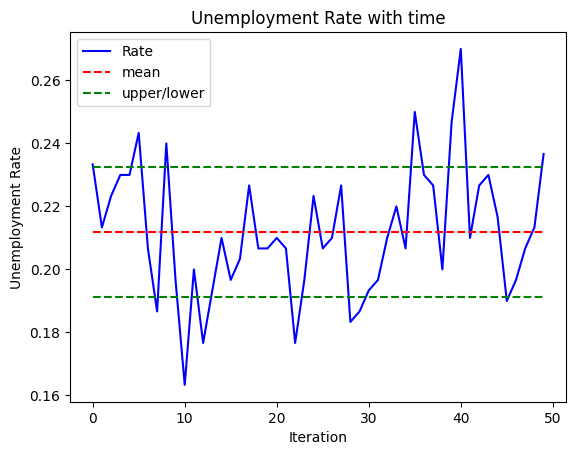

In [ ]:
steps=np.linspace(0,49)
mean_unemployment_rate=np.mean(unemployment_rate)
upper_dev=mean_unemployment_rate+np.std(unemployment_rate)
lower_dev=mean_unemployment_rate-np.std(unemployment_rate)

plt.plot(steps,unemployment_rate,'b',label="Rate")
plt.plot(steps,[mean_unemployment_rate for i in range(50)],'r',label="mean",linestyle="dashed")
plt.plot(steps,[upper_dev for i in range(50)],'g',label="upper/lower",linestyle="dashed")
plt.plot(steps,[lower_dev for i in range(50)],'g',linestyle="dashed")
plt.xlabel("Iteration")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.title("Unemployment Rate with time")
plt.savefig("unemployment_rate")

# Interpretation

The graph shows the unemployment rate with time.

1. The red line represents the average or mean unemployment rate, while the green lines represent the standard deviation or the spread of the unemployment data. Typically, a large portion of the unemployment data falls within one standard deviation of the mean, which is between $(\mu-\sigma,\mu +\sigma)$.

2. Sometimes, there may be a spike in the unemployment rate, which could be due to various reasons. For example, it could be due to an economic recession. Additionally, it's possible that a company may decide to invest in technology to automate tasks and decrease the need for human labor, which could lead to job loss and a spike in unemployment.

3. On the other hand, a low unemployment rate could indicate a healthy job market and could be a result of factors such as increased demand for labor or employers deciding to hire more workers than usual. However, a very low unemployment rate could also lead to challenges such as labor shortages and wage inflation.

In [ ]:
print(f"Total Investment in Technology(Employer 1):{int(np.sum(employers[0].investment_amt))}")
print(f"Total Investment in Technology(Employer 2):{int(np.sum(employers[1].investment_amt))}")
print(f"Total Investment in Technology(Employer 3):{int(np.sum(employers[2].investment_amt))}")
print(f"Total Investment in Technology(Employer 4):{int(np.sum(employers[3].investment_amt))}")
print(f"Total Investment in Technology(Employer 5):{int(np.sum(employers[4].investment_amt))}")

Total Investment in Technology(Employer 1):381550
Total Investment in Technology(Employer 2):207552
Total Investment in Technology(Employer 3):436790
Total Investment in Technology(Employer 4):186655
Total Investment in Technology(Employer 5):375295


Text(0.5, 1.0, 'No of workers under each employer')

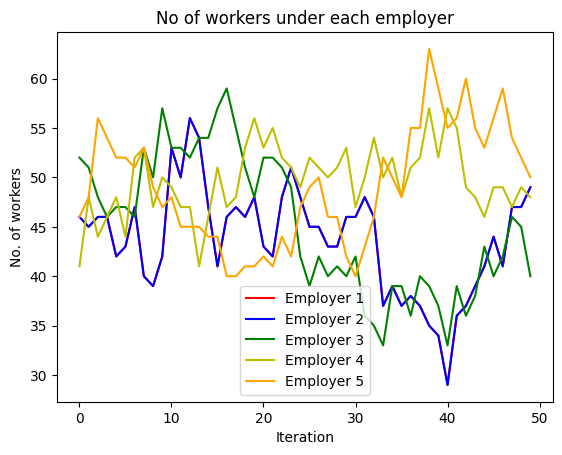

In [ ]:
plt.plot(steps,emp1_workers,'r',label="Employer 1")
plt.plot(steps,emp1_workers,'b',label="Employer 2")
plt.plot(steps,emp3_workers,'g',label="Employer 3")
plt.plot(steps,emp4_workers,'y',label="Employer 4")
plt.plot(steps,emp5_workers,'orange',label="Employer 5")
plt.xlabel("Iteration")
plt.ylabel("No. of workers")
plt.legend()
plt.title("No of workers under each employer")


# Interpretation

From the two code outputs, we can observe that there is an inverse relationship between the number of workers and the amount of investment in technology. Specifically, companies that invest more in technology tend to have fewer workers, while companies that invest less in technology tend to have more workers. This is because investing in technology often involves automating tasks and reducing the need for human labor.

However, it's important to note that this relationship may not hold true in all cases, as there may be other factors that influence the number of workers a company employs, the size of the company, and the level of competition in the market. Additionally, companies may choose to invest in technology in different ways, some of which may not lead to a significant reduction in the number of workers.

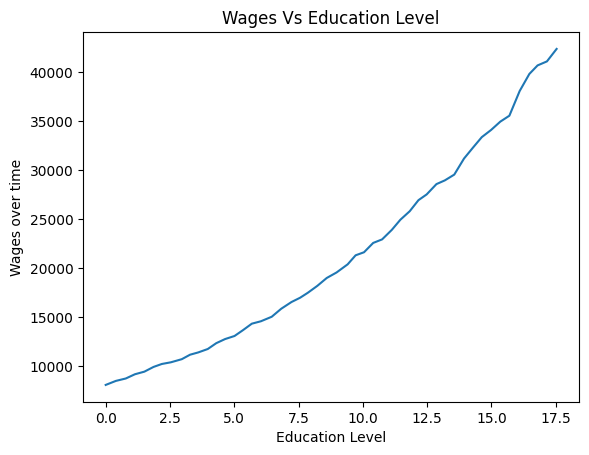

In [ ]:
plt.plot(avg_education_level,avg_wages)
plt.xlabel("Education Level")
plt.ylabel("Wages over time")
plt.title("Wages Vs Education Level")
plt.savefig("wage_edu")

# Interpretation

Based on data, it is generally observed that the average wages of workers tend to increase as their education level increases. This trend can be attributed to several factors, the higher productivity and efficiency of educated workers, and the potential for higher-level positions and career advancement opportunities for those with advanced degrees.

However, it's important to note that this relationship may not hold true in all cases, as there may be other factors that influence wages, such as experience, job performance, and location.

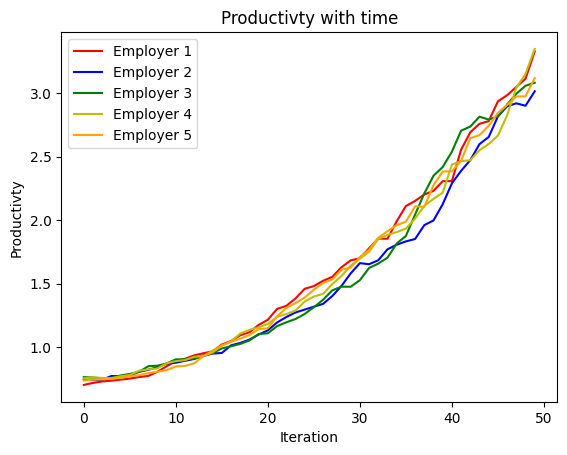

In [ ]:
plt.plot(steps,emp1_prod,'r',label="Employer 1")
plt.plot(steps,emp2_prod,'b',label="Employer 2")
plt.plot(steps,emp3_prod,'g',label="Employer 3")
plt.plot(steps,emp4_prod,'y',label="Employer 4")
plt.plot(steps,emp5_prod,'orange',label="Employer 5")
plt.xlabel("Iteration")
plt.ylabel("Productivty")
plt.legend()
plt.title("Productivty with time")
plt.savefig("emp_prod")

# Interpretation

It is true that companies hire workers with higher education levels in order to increase productivity, as these workers may possess more advanced skills that can help the company perform better. That's whuc company productivity level increases with time.

It is also seen that companies see a significant increase in productivity when they invest in technology. This is because technology can automate tasks, reduce errors, and improve efficiency, which can lead to increased productivity and profitability.

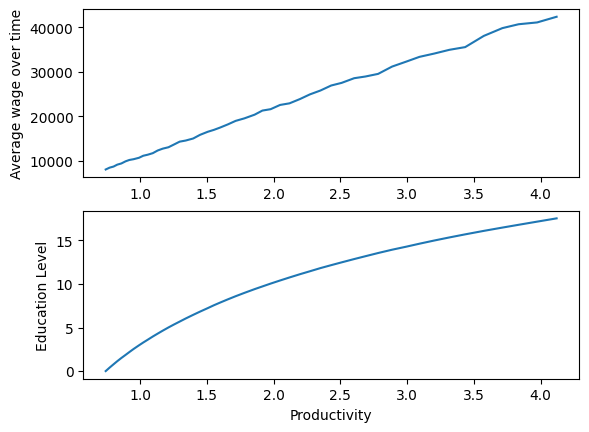

In [ ]:
plt.subplot(2,1,1)
plt.plot(avg_productivity_level,avg_wages)
plt.ylabel("Average wage over time")

plt.subplot(2,1,2)
plt.plot(avg_productivity_level,avg_education_level)
plt.xlabel("Productivity")
plt.ylabel("Education Level")

plt.savefig("subplts")

# Interpretation

From the graph, it appears that there is a positive relationship between worker productivity and average wage, as well as between education level and productivity. Specifically, workers with higher levels of education tend to be more productive, which can lead to higher wages. Similarly, workers who are more productive may also earn higher wages, as their output can contribute to the company's profitability.


In [ ]:
# To generate a gif file, shows number of workers in each company at every step

# Optional to run

fig = plt.figure(figsize=(7,5))
axes = fig.add_subplot(1,1,1)
plt.style.use("seaborn")

palette = list(reversed(sns.color_palette("afmhot", 5).as_hex()))

def animate(i):
    if i>=50:
      pass
    else:
      y1=emp1_workers[i]
      y2=emp2_workers[i]
      y3=emp3_workers[i]
      y4=emp4_workers[i]
      y5=emp5_workers[i]
      print(i)

      plt.bar(range(5), [y1,y2, y3, y4, y5], color=palette)
      tick_lst=["1", "2", "3", "4", "5"]
      plt.xticks(np.arange(5), tick_lst)
      plt.title("No of workers:Iteration {}".format(i), color=("blue"))

ani = FuncAnimation(fig, animate, interval=10000)

f = r"worker.gif"
writergif = animation.PillowWriter(fps=3)
ani.save(f, writer=writergif)

# Summary

1. The relationship between education level and wages is generally positive, meaning that workers with higher levels of education tend to earn higher wages on average. This is likely due to their possession of more advanced skills and knowledge that can be applied in the workplace.

2. Investing in technology can increase productivity of the company. Technology can automate tasks, reduce errors, and improve efficiency, all of which can contribute to higher productivity and profitability.

3. There may be a positive correlation between education level and productivity, meaning that workers with higher levels of education may be more productive. This may be due to their possession of advanced skills and knowledge. However, other factors such as experience, job performance may also impact productivity and wages.

4. The relationship between education level, productivity, and wages may vary across industries and job roles.

5. The unemployment rate is typically distributed around the mean with the majority falling within one standard deviation. However, spikes in unemployment can occur due to various reasons such as recession, industry challenges, or companies investing in technology to reduce labor. Conversely, a low unemployment rate can indicate a healthy job market, but extremely low rates can lead to challenges like labor shortages.

# Recommendations

1. Companies should carefully consider the potential benefits and drawbacks of investing in technology before doing so. This includes assessing the impact on productivity, wages.

2. Employers should provide opportunities for workers to gain new skills and education, which can increase productivity and lead to higher wages. This can include offering training programs, supporting continuing education, and providing mentorship and career advancement opportunities.

3. It is important to have policies and programs that support workers with different educational backgrounds to ensure that everyone has access to fair wages and opportunities for career advancement.


# Additional Work

1. To make the model more complex, we can add different industries such as agriculture, IT, transportation, etc. and analyze the wage distribution and unemployment rate in each sector. This will give us a more nuanced understanding of the labor market.

2. Age and gender are important factors that influence wages and productivity. Therefore, we can include them in our model to study the wage distribution across different age and gender groups.

3. We can incorporate more choices for workers such as the option to migrate for better jobs or work in multiple jobs simultaneously. Similarly, employers can decide to expand their business or offer better compensation packages to retain workers.

4. Another way to add complexity is to include a third agent, such as the government, and analyze how policies such as minimum wage laws or tax incentives can impact the interactions between the workers and employers. This can help us understand the broader economic and social implications of different policy choices.







# Shashwat

-  Formulated the agent-based model for labor dynamics and wrote the **Description of the model** section in written.

- Wrote the code for the **worker agent** in Python

- Contributed to making graphs and interpreting their output

-  Completed the **summary** section and refined the language to provide a clear and concise overview of our findings.



# Arjit

- Completed the **Description of the problem** section

- Wrote the code for the **employer agent** in Python

- Contributed to making graphs and interpretation of the outputs.

- Completed the **Additional Work** section, proposed several ideas to further improve our model

# Harshal

- A major portion of the presentation was designed

- Wrote the code for running the **simulation loop**

- Contributed to making graphs and interpretation of the outputs.

- Completed the **Recommnedation** section